In [1]:
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
os.getcwd()
warnings.filterwarnings("ignore")

In [3]:
# Include preprocessing and evaluation
%run 'preprocessing.ipynb'
%run 'evaluation.ipynb'

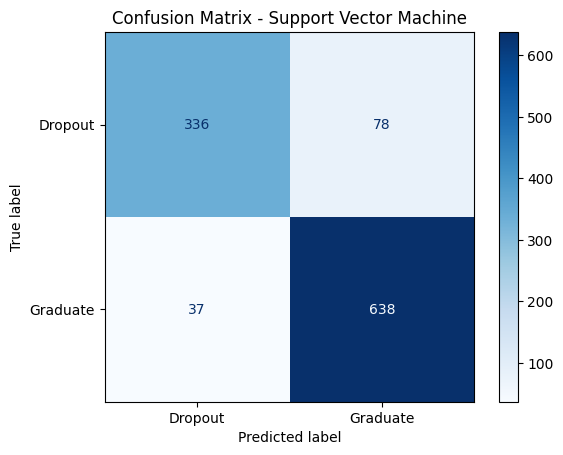


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.90      | 0.81   | 0.85     |
    | Graduate   | 0.89      | 0.95   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.878     |            
    --------------------------
    


In [5]:
# Train a SVC
model_name = 'Support Vector Machine'
test_size = 0.3
X_train, X_test, y_train, y_test = preprocessing(test_size, False)

model = SVC(class_weight='balanced', probability=True, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_pred, model_name))

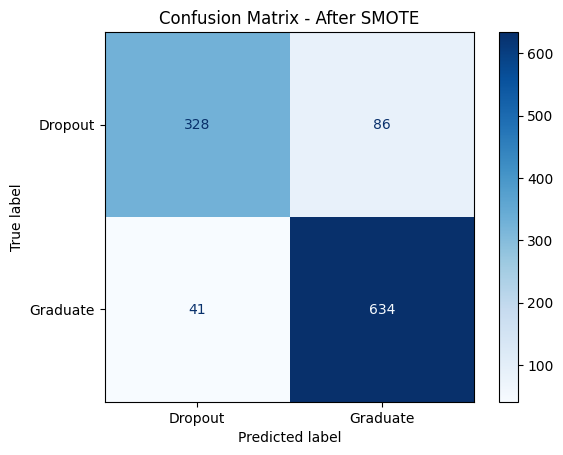


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.89      | 0.79   | 0.84     |
    | Graduate   | 0.88      | 0.94   | 0.91     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.88      |          
    | ROC-AUC    | 0.866     |            
    --------------------------
    


In [6]:
# Handle class imbalance using SMOTE
X_train, X_test, y_train, y_test = preprocessing(test_size, True)

# Train the Random Forest model on the resampled dataset
svc = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = svc.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_rf_pred, 'After SMOTE'))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy: 0.8976672635779608


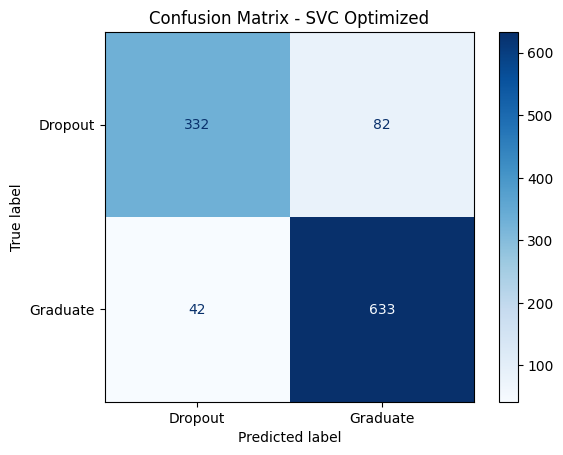


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.89      | 0.80   | 0.84     |
    | Graduate   | 0.89      | 0.94   | 0.91     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.870     |            
    --------------------------
    


In [7]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],                 # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],    # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1], # Kernel coefficient
    'degree': [2, 3, 4],                   # Only used for 'poly' kernel
    'class_weight': [None, 'balanced']     # Handle class imbalance
}
# Create an SVC model
svc = SVC()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the optimized model
optimized_log = grid_search.best_estimator_
optimized_log.fit(X_train, y_train)

# Evaluate on the test set
y_optimized_pred = optimized_log.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_optimized_pred, 'SVC Optimized'))

Fitting 5 folds for each of 39366 candidates, totalling 196830 fits
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 10, 'scale_pos_weight': 1, 'subsample': 1.0}
Best Accuracy: 0.9047623099175471


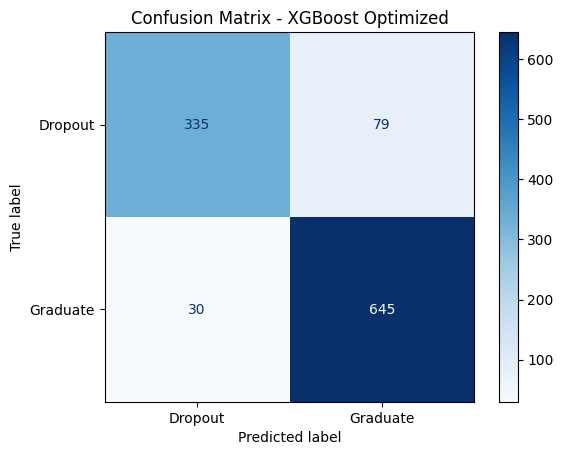


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.92      | 0.81   | 0.86     |
    | Graduate   | 0.89      | 0.96   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.90      |          
    | ROC-AUC    | 0.882     |            
    --------------------------
    


In [5]:
from xgboost import XGBClassifier

# Create an XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],               # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],            # Step size at each boosting iteration
    'max_depth': [3, 5, 7],                       # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                # Minimum sum of weights for child nodes
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of training data used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],          # Fraction of features used per tree
    'gamma': [0, 1, 5],                           # Minimum loss reduction for a split
    'reg_alpha': [0, 0.1, 1],                     # L1 regularization
    'reg_lambda': [1, 10],                        # L2 regularization
    'scale_pos_weight': [1, 3, 5]                 # Class weight for imbalanced datasets
}

model_name = 'XGBoost Optimized'
test_size = 0.3
X_train, X_test, y_train, y_test = preprocessing(test_size, False)


# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_pred, model_name))